In [1]:
%display plain
#%display latex

In [2]:
from matplotlib import cm
import numpy as np
import itertools
from itertools import combinations
from __future__ import print_function

In [3]:
real_vars = var('r,t,theta,phi,x,y,z')
for rv in real_vars:
    assume(rv, 'real')

In [4]:
xs = var(['x{}'.format(n) for n in range(5)])
for xi in xs: assume(xi,'real')

ys = var(['y{}'.format(n) for n in range(4)])
for yi in ys: assume(yi,'real')

xs, ys

((x0, x1, x2, x3, x4), (y0, y1, y2, y3))

In [19]:
p1 = sum([xi   for xi in xs])
p2 = sum([xi^2 for xi in xs])
p3 = sum([xi^3 for xi in xs])
p4 = sum([xi^4 for xi in xs])
p5 = sum([xi^5 for xi in xs])

p1, p2, p3, p4, p5

(x0 + x1 + x2 + x3 + x4,
 x0^2 + x1^2 + x2^2 + x3^2 + x4^2,
 x0^3 + x1^3 + x2^3 + x3^3 + x4^3,
 x0^4 + x1^4 + x2^4 + x3^4 + x4^4,
 x0^5 + x1^5 + x2^5 + x3^5 + x4^5)

In [6]:
e1 = sum([ xi             for (xi,           ) in combinations(xs,1)])
e2 = sum([ xi*xj          for (xi,xj         ) in combinations(xs,2)])
e3 = sum([ xi*xj*xk       for (xi,xj,xk      ) in combinations(xs,3)])
e4 = sum([ xi*xj*xk*xl    for (xi,xj,xk,xl   ) in combinations(xs,4)])
e5 = sum([ xi*xj*xk*xl*xm for (xi,xj,xk,xl,xm) in combinations(xs,5)])

e1, e2, e3, e4, e5

(x0 + x1 + x2 + x3 + x4,
 x0*x1 + x0*x2 + x1*x2 + x0*x3 + x1*x3 + x2*x3 + x0*x4 + x1*x4 + x2*x4 + x3*x4,
 x0*x1*x2 + x0*x1*x3 + x0*x2*x3 + x1*x2*x3 + x0*x1*x4 + x0*x2*x4 + x1*x2*x4 + x0*x3*x4 + x1*x3*x4 + x2*x3*x4,
 x0*x1*x2*x3 + x0*x1*x2*x4 + x0*x1*x3*x4 + x0*x2*x3*x4 + x1*x2*x3*x4,
 x0*x1*x2*x3*x4)

In [7]:
def inner_product(f,g,vrs):
    ip = (f.conjugate()*g).expand()*exp(-sum([vi^2 for vi in vrs]))/(2*pi)^len(vrs)
    # odd parts will integrate out, so remove them. makes this go quite a bit faster
    for vi in vrs:
        ip = ((ip+ip(vi=-vi))/2).simplify_full()
    for vi in vrs:
        ip = integrate(ip,vi,-oo,oo)
    return ip

In [8]:
com = vector([1,1,1,1,1])/sqrt(5) # center of mass

j1 = vector(QQ,[1,0,0,0,0])
j2 = vector(QQ,[0,1,0,0,0])
j3 = vector(QQ,[0,0,1,0,0])
j4 = vector(QQ,[0,0,0,1,0])

j1 = j1 - (j1*com)*com/com.norm()^2
j2 = j2 - (j2*com)*com/com.norm()^2
j3 = j3 - (j3*com)*com/com.norm()^2
j4 = j4 - (j4*com)*com/com.norm()^2

j2 = j2 - (j2*j1)*j1/j1.norm()^2
j3 = j3 - (j3*j1)*j1/j1.norm()^2
j4 = j4 - (j4*j1)*j1/j1.norm()^2

j3 = j3 - (j3*j2)*j2/j2.norm()^2
j4 = j4 - (j4*j2)*j2/j2.norm()^2

j4 = j4 - (j4*j3)*j3/j3.norm()^2

j1 = j1/j1.norm()
j2 = j2/j2.norm()
j3 = j3/j3.norm()
j4 = j4/j4.norm()

In [9]:
Pm = matrix([com,j1,j2,j3,j4]).transpose()

Qm = matrix([[0,0,0,0],
             [1,0,0,0],
             [0,1,0,0],
             [0,0,1,0],
             [0,0,0,1]])

In [10]:
threebody_mats = [
    # 012
    matrix([[1, 1, 1, 1, 1],
            [1,-1, 0, 0, 0],
            [0, 1,-1, 0, 0]]),
    # 013
    matrix([[1, 1, 1, 1, 1],
            [1,-1, 0, 0, 0],
            [0, 1, 0,-1, 0]]),
    # 014
    matrix([[1, 1, 1, 1, 1],
            [1,-1, 0, 0, 0],
            [0, 1, 0, 0,-1]]),
    # 023
    matrix([[1, 1, 1, 1, 1],
            [1, 0,-1, 0, 0],
            [0, 0, 1,-1, 0]]),
    # 024
    matrix([[1, 1, 1, 1, 1],
            [1, 0,-1, 0, 0],
            [0, 0, 1, 0,-1]]),
    # 034
    matrix([[1, 1, 1, 1, 1],
            [1, 0, 0,-1, 0],
            [0, 0, 0, 1,-1]]),
    # 123
    matrix([[1, 1, 1, 1, 1],
            [0, 1,-1, 0, 0],
            [0, 0, 1,-1, 0]]),
    # 124
    matrix([[1, 1, 1, 1, 1],
            [0, 1,-1, 0, 0],
            [0, 0, 1, 0,-1]]),
    # 134
    matrix([[1, 1, 1, 1, 1],
            [0, 1, 0,-1, 0],
            [0, 0, 0, 1,-1]]),
    # 234
    matrix([[1, 1, 1, 1, 1],
            [0, 0, 1,-1, 0],
            [0, 0, 0, 1,-1]])
]

Pl = matrix([j1,j2,j3,j4]).transpose()

def orthogonalize_rows(M):
    rows = list(M)
    for idx in range(len(rows)):
        rows[idx] = (rows[idx]/rows[idx].norm()).simplify_full()
        for idx2 in range(idx+1,len(rows)):
            rows[idx2] = rows[idx2] - (rows[idx2]*rows[idx])*rows[idx]
    return matrix(rows)
    
# the (5 choose 3) 3-body interations in 5 dimensions
tbi5s = [ M.right_kernel().basis_matrix() for M in threebody_mats ]
tbi5s = [ orthogonalize_rows(M) for M in tbi5s]

# the (5 choose 3) 3-body interations in 4 dimensions
tbi4s = [ (M*Pl).right_kernel().basis_matrix() for M in threebody_mats ]
tbi4s = [ orthogonalize_rows(M) for M in tbi4s]

In [11]:
f1 = e1(*(Pm*Qm*vector(ys))).simplify_full()
f2 = e2(*(Pm*Qm*vector(ys))).simplify_full()
f3 = e3(*(Pm*Qm*vector(ys))).simplify_full()
f4 = e4(*(Pm*Qm*vector(ys))).simplify_full()
f5 = e5(*(Pm*Qm*vector(ys))).simplify_full()

f1, f2, f3, f4, f5

(0,
 -1/2*y0^2 - 1/2*y1^2 - 1/2*y2^2 - 1/2*y3^2,
 1/180*sqrt(2)*(9*sqrt(5)*sqrt(2)*y0^3 - 9*sqrt(5)*sqrt(2)*y0*y1^2 + 10*sqrt(3)*sqrt(2)*y1^3 + 10*sqrt(3)*y2^3 - 3*(3*sqrt(5)*sqrt(2)*y0 + 5*sqrt(3)*sqrt(2)*y1)*y2^2 - 3*(3*sqrt(5)*sqrt(2)*y0 + 5*sqrt(3)*sqrt(2)*y1 + 10*sqrt(3)*y2)*y3^2),
 -1/3600*sqrt(5)*sqrt(3)*(9*sqrt(5)*sqrt(3)*y0^4 - 42*sqrt(5)*sqrt(3)*y0^2*y1^2 + 5*sqrt(5)*sqrt(3)*y1^4 - 120*y0*y1^3 - 20*(sqrt(5)*sqrt(3)*sqrt(2)*y1 + 3*sqrt(2)*y0)*y2^3 - 6*(7*sqrt(5)*sqrt(3)*y0^2 + 5*sqrt(5)*sqrt(3)*y1^2 - 30*y0*y1)*y2^2 - 6*(7*sqrt(5)*sqrt(3)*y0^2 + 5*sqrt(5)*sqrt(3)*y1^2 - 30*y0*y1 - 10*(sqrt(5)*sqrt(3)*sqrt(2)*y1 + 3*sqrt(2)*y0)*y2)*y3^2),
 -1/9000*sqrt(5)*(40*sqrt(5)*sqrt(3)*y0^2*y1^3 - 9*y0^5 + 90*y0^3*y1^2 + 75*y0*y1^4 + 20*(sqrt(5)*sqrt(3)*sqrt(2)*y0^2 - 15*sqrt(2)*y0*y1)*y2^3 - 30*(2*sqrt(5)*sqrt(3)*y0^2*y1 - 3*y0^3 + 15*y0*y1^2)*y2^2 - 30*(2*sqrt(5)*sqrt(3)*y0^2*y1 - 3*y0^3 + 15*y0*y1^2 + 2*(sqrt(5)*sqrt(3)*sqrt(2)*y0^2 - 15*sqrt(2)*y0*y1)*y2)*y3^2))

In [12]:
def stereographic_proj(v):
    """ Standard Stereographic projection with possible pre-rotation about X, Y and Z axis"""
    w = vector(v)
    return (w[0]/(1-w[2]),w[1]/(1-w[2]))

def to_iso_spherical_coords(v):
    x, y, z = v
    r = sqrt(x^2+y^2+z^2)
    theta = arccos(z/r)
    phi = atan2(y,x)
    return (r,theta,phi)

def to_iso_sphere_coords(v):
    r, theta, phi = to_iso_spherical_coords(v)
    return (phi, theta) #(theta, phi)

In [13]:
def legendre_poly(n):
    return diff( (x^2-1)^n, x, n)/(2^n*factorial(n))

def assoc_legendre_poly(m,l):
    if m >= 0:
        return (-1)^m * (1-x^2)^(m/2) *diff(legendre_poly(l),x,m)
    else:
        return (-1)^m * factorial(l-m) /factorial(l+m) * assoc_legendre_poly(-m,l)

def real_sh(m,l):
    return r^(l)*cos(m*phi)*assoc_legendre_poly(m,l)(x=cos(theta))

def imag_sh(m,l):
    return r^(l)*sin(m*phi)*assoc_legendre_poly(m,l)(x=cos(theta))

def polar_to_euclid(f):
    return ( f(theta=arccos(y2/r)) )(r=sqrt(y0^2+y1^2+y2^2), phi=atan2(y1,y0))

def euclid_real(m,l):
    return polar_to_euclid(real_sh(m,l)).simplify()

def euclid_imag(m,l):
    return polar_to_euclid(imag_sh(m,l)).simplify()

def euclid_to_sphere(f):
    return f(y0=r*sin(theta)*cos(phi),y1=r*sin(theta)*sin(phi),y2=r*cos(theta))

In [14]:
def lap(f,vrs):
    """ laplacian """
    return sum([diff(f,vi,2) for vi in vrs])

def rep_lap(f,k,vrs):
    """ repeated laplacian  """
    if k <= 0:
        return f
    elif k == 1:
        return lap(f,vrs)
    else:
        return lap(rep_lap(f,k-1,vrs),vrs)
    
def semi_factorial(n):
    """ product: n*(n-2)*(n-4)*...*1 """
    if n <= 1:
        return 1
    else:
        return n*semi_factorial(n-2)
    
def harmonic_leading_term(f,n,vrs):
    """ as in (1-33), pg 8 of Avery's Hyperspherical Harmonics, Applications in Quantu Theory """
    r_sq = sum([vi^2 for vi in vrs])
    d = len(vrs)
    return sum([ ((-1)^k)*semi_factorial(d+2*n-2*k-4) \
                / ( semi_factorial(2*k) * semi_factorial(d+2*n-4) ) \
                * (r_sq^k) * rep_lap(f,k,vrs) for k in range(floor(n/2)+1)])

In [ ]:
def rotation_matrix(theta):
    return matrix([[cos(theta), -sin(theta)],
                   [sin(theta),  cos(theta)]])

In [15]:
# a harmonic symmetric function of degree 3 in 5 variables
sym_fn_3 = 0
ell = 3
for vec in list(identity_matrix(5)):
    sym_fn_3 += (r^ell*gegenbauer(ell,5/2-1,
                                  (vec/norm(vec))*(vector(xs)/norm(vector(xs)))))\
    (r=sqrt(sum([xi^2 for xi in xs]))).simplify_full()

# check symmetry
assert (sym_fn_3(x0=x1,x1=x0)-sym_fn_3).expand() == 0
assert (sym_fn_3(x0=x2,x2=x0)-sym_fn_3).expand() == 0
assert (sym_fn_3(x0=x3,x3=x0)-sym_fn_3).expand() == 0
assert (sym_fn_3(x0=x4,x4=x0)-sym_fn_3).expand() == 0

# is harmonic
assert lap(sym_fn_3,xs).simplify_full() == 0

sym_fn_3.expand()

10*x0^3 - 15/2*x0^2*x1 - 15/2*x0*x1^2 + 10*x1^3 - 15/2*x0^2*x2 - 15/2*x1^2*x2 - 15/2*x0*x2^2 - 15/2*x1*x2^2 + 10*x2^3 - 15/2*x0^2*x3 - 15/2*x1^2*x3 - 15/2*x2^2*x3 - 15/2*x0*x3^2 - 15/2*x1*x3^2 - 15/2*x2*x3^2 + 10*x3^3 - 15/2*x0^2*x4 - 15/2*x1^2*x4 - 15/2*x2^2*x4 - 15/2*x3^2*x4 - 15/2*x0*x4^2 - 15/2*x1*x4^2 - 15/2*x2*x4^2 - 15/2*x3*x4^2 + 10*x4^3

In [84]:
# does not vanish on the 3 body coincidences
for tbi in tbi5s:
    print( sym_fn_3(*(vector([x,y])*tbi)).expand() )

-35/6*sqrt(3)*x^3 - 21/4*sqrt(5)*x^2*y + 21/4*sqrt(5)*y^3
-35/6*sqrt(3)*x^3 - 21/4*sqrt(5)*x^2*y + 21/4*sqrt(5)*y^3
-35/6*sqrt(3)*x^3 - 21/4*sqrt(5)*x^2*y + 21/4*sqrt(5)*y^3
-35/6*sqrt(3)*x^3 - 21/4*sqrt(5)*x^2*y + 21/4*sqrt(5)*y^3
-35/6*sqrt(3)*x^3 - 21/4*sqrt(5)*x^2*y + 21/4*sqrt(5)*y^3
-35/6*sqrt(3)*x^3 - 21/4*sqrt(5)*x^2*y + 21/4*sqrt(5)*y^3
-21/4*sqrt(15)*sqrt(2)*x^2*y - 7/12*sqrt(15)*sqrt(2)*y^3
-21/4*sqrt(15)*sqrt(2)*x^2*y - 7/12*sqrt(15)*sqrt(2)*y^3
-21/4*sqrt(15)*sqrt(2)*x^2*y - 7/12*sqrt(15)*sqrt(2)*y^3
63/32*sqrt(15)*sqrt(2)*x^2*y - 119/96*sqrt(15)*sqrt(2)*y^3 + 105/32*sqrt(2)*x^3 + 525/32*sqrt(2)*x*y^2


2.22985436262 0.0 4.96506923553


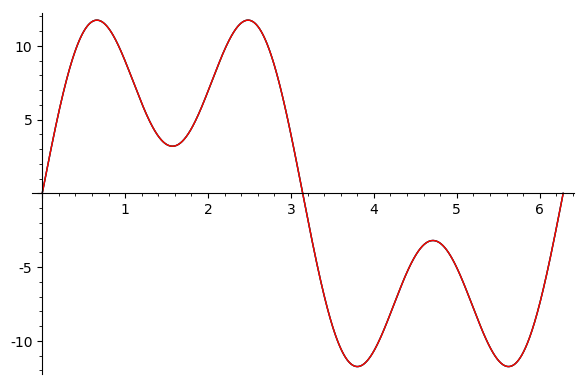

In [87]:
# all the cubics appear to be rotations of each other, though the algebraic values of the angles are not yet known
theta1 = find_root(sym_fn_3(*(vector([1,0])*rotation_matrix(theta)*tbi5s[0])).simplify_full(),  0,   pi)
theta2 = find_root(sym_fn_3(*(vector([1,0])*rotation_matrix(theta)*tbi5s[6])).simplify_full(),  0,   pi)
theta3 = find_root(sym_fn_3(*(vector([1,0])*rotation_matrix(theta)*tbi5s[9])).simplify_full(), pi, 2*pi)

print(theta1,theta2,theta3)

P  = plot( sym_fn_3(*(vector([1,0])*rotation_matrix(theta+theta1)*tbi5s[0])), (theta,0,2*pi) )
P += plot( sym_fn_3(*(vector([1,0])*rotation_matrix(theta+theta2)*tbi5s[6])), (theta,0,2*pi), color='green' )
P += plot( sym_fn_3(*(vector([1,0])*rotation_matrix(theta+theta3)*tbi5s[9])), (theta,0,2*pi), color='red' )

P.show()

In [16]:
# a harmonic symmetric function of degree 4 in 5 variables
sym_fn_4 = 0
ell = 4
for vec in list(identity_matrix(5)):
    sym_fn_4 += (r^ell*gegenbauer(ell,5/2-1,
                                  (vec/norm(vec))*(vector(xs)/norm(vector(xs)))))\
    (r=sqrt(sum([xi^2 for xi in xs]))).simplify_full()

# check symmetry
assert (sym_fn_4(x0=x1,x1=x0)-sym_fn_4).expand() == 0
assert (sym_fn_4(x0=x2,x2=x0)-sym_fn_4).expand() == 0
assert (sym_fn_4(x0=x3,x3=x0)-sym_fn_4).expand() == 0
assert (sym_fn_4(x0=x4,x4=x0)-sym_fn_4).expand() == 0

# is harmonic
assert lap(sym_fn_4,xs).simplify_full() == 0

sym_fn_4.expand()

45/2*x0^4 - 135/4*x0^2*x1^2 + 45/2*x1^4 - 135/4*x0^2*x2^2 - 135/4*x1^2*x2^2 + 45/2*x2^4 - 135/4*x0^2*x3^2 - 135/4*x1^2*x3^2 - 135/4*x2^2*x3^2 + 45/2*x3^4 - 135/4*x0^2*x4^2 - 135/4*x1^2*x4^2 - 135/4*x2^2*x4^2 - 135/4*x3^2*x4^2 + 45/2*x4^4

In [88]:
# does not vanish on the 3 body coincidences
for tbi in tbi5s:
    print( sym_fn_4(*(vector([x,y])*tbi)).expand() )

21/4*sqrt(5)*sqrt(3)*x^3*y + 195/32*x^4 - 351/16*x^2*y^2 + 279/32*y^4
21/4*sqrt(5)*sqrt(3)*x^3*y + 195/32*x^4 - 351/16*x^2*y^2 + 279/32*y^4
21/4*sqrt(5)*sqrt(3)*x^3*y + 195/32*x^4 - 351/16*x^2*y^2 + 279/32*y^4
21/4*sqrt(5)*sqrt(3)*x^3*y + 195/32*x^4 - 351/16*x^2*y^2 + 279/32*y^4
21/4*sqrt(5)*sqrt(3)*x^3*y + 195/32*x^4 - 351/16*x^2*y^2 + 279/32*y^4
21/4*sqrt(5)*sqrt(3)*x^3*y + 195/32*x^4 - 351/16*x^2*y^2 + 279/32*y^4
45/16*x^4 + 297/8*x^2*y^2 - 123/16*y^4
45/16*x^4 + 297/8*x^2*y^2 - 123/16*y^4
45/16*x^4 + 297/8*x^2*y^2 - 123/16*y^4
189/32*sqrt(15)*x^3*y - 105/32*sqrt(15)*x*y^3 - 585/128*x^4 + 1431/64*x^2*y^2 + 591/128*y^4


1.0832213821 1.99495967307 0.676843601413


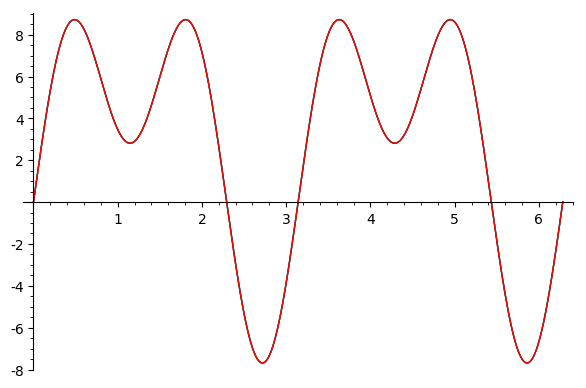

In [94]:
# all the cubics appear to be rotations of each other, though the algebraic values of the angles are not yet known
theta1 = find_root(sym_fn_4(*(vector([1,0])*rotation_matrix(theta)*tbi5s[0])).simplify_full(),  0,   pi)
theta2 = find_root(sym_fn_4(*(vector([1,0])*rotation_matrix(theta)*tbi5s[6])).simplify_full(),  0,   pi)
theta3 = find_root(sym_fn_4(*(vector([1,0])*rotation_matrix(theta)*tbi5s[9])).simplify_full(),  0, pi/2)

print(theta1,theta2,theta3)

P  = plot( sym_fn_4(*(vector([1,0])*rotation_matrix(theta+theta1)*tbi5s[0])), (theta,0,2*pi) )
P += plot( sym_fn_4(*(vector([1,0])*rotation_matrix(theta+theta2)*tbi5s[6])), (theta,0,2*pi), color='green' )
P += plot( sym_fn_4(*(vector([1,0])*rotation_matrix(theta+theta3)*tbi5s[9])), (theta,0,2*pi), color='red' )

P.show()

In [17]:
# a harmonic symmetric function of degree 5 in 5 variables
sym_fn_5 = 0
ell = 5
for vec in list(identity_matrix(5)):
    sym_fn_5 += (r^ell*gegenbauer(ell,5/2-1,
                                  (vec/norm(vec))*(vector(xs)/norm(vector(xs)))))\
    (r=sqrt(sum([xi^2 for xi in xs]))).simplify_full()

# check symmetry
assert (sym_fn_5(x0=x1,x1=x0)-sym_fn_5).expand() == 0
assert (sym_fn_5(x0=x2,x2=x0)-sym_fn_5).expand() == 0
assert (sym_fn_5(x0=x3,x3=x0)-sym_fn_5).expand() == 0
assert (sym_fn_5(x0=x4,x4=x0)-sym_fn_5).expand() == 0

# is harmonic
assert lap(sym_fn_5,xs).simplify_full() == 0

sym_fn_5.expand()

21*x0^5 + 105/8*x0^4*x1 - 105/2*x0^3*x1^2 - 105/2*x0^2*x1^3 + 105/8*x0*x1^4 + 21*x1^5 + 105/8*x0^4*x2 + 105/4*x0^2*x1^2*x2 + 105/8*x1^4*x2 - 105/2*x0^3*x2^2 + 105/4*x0^2*x1*x2^2 + 105/4*x0*x1^2*x2^2 - 105/2*x1^3*x2^2 - 105/2*x0^2*x2^3 - 105/2*x1^2*x2^3 + 105/8*x0*x2^4 + 105/8*x1*x2^4 + 21*x2^5 + 105/8*x0^4*x3 + 105/4*x0^2*x1^2*x3 + 105/8*x1^4*x3 + 105/4*x0^2*x2^2*x3 + 105/4*x1^2*x2^2*x3 + 105/8*x2^4*x3 - 105/2*x0^3*x3^2 + 105/4*x0^2*x1*x3^2 + 105/4*x0*x1^2*x3^2 - 105/2*x1^3*x3^2 + 105/4*x0^2*x2*x3^2 + 105/4*x1^2*x2*x3^2 + 105/4*x0*x2^2*x3^2 + 105/4*x1*x2^2*x3^2 - 105/2*x2^3*x3^2 - 105/2*x0^2*x3^3 - 105/2*x1^2*x3^3 - 105/2*x2^2*x3^3 + 105/8*x0*x3^4 + 105/8*x1*x3^4 + 105/8*x2*x3^4 + 21*x3^5 + 105/8*x0^4*x4 + 105/4*x0^2*x1^2*x4 + 105/8*x1^4*x4 + 105/4*x0^2*x2^2*x4 + 105/4*x1^2*x2^2*x4 + 105/8*x2^4*x4 + 105/4*x0^2*x3^2*x4 + 105/4*x1^2*x3^2*x4 + 105/4*x2^2*x3^2*x4 + 105/8*x3^4*x4 - 105/2*x0^3*x4^2 + 105/4*x0^2*x1*x4^2 + 105/4*x0*x1^2*x4^2 - 105/2*x1^3*x4^2 + 105/4*x0^2*x2*x4^2 + 105/4*x1^2*

In [89]:
# does not vanish on the 3 body coincidences
for tbi in tbi5s:
    print( sym_fn_5(*(vector([x,y])*tbi)).expand() )

35/16*sqrt(3)*x^5 - 105/64*sqrt(5)*x^4*y + 189/16*sqrt(3)*x^3*y^2 - 693/160*sqrt(5)*x^2*y^3 - 2457/1600*sqrt(5)*y^5
35/16*sqrt(3)*x^5 - 105/64*sqrt(5)*x^4*y + 189/16*sqrt(3)*x^3*y^2 - 693/160*sqrt(5)*x^2*y^3 - 2457/1600*sqrt(5)*y^5
35/16*sqrt(3)*x^5 - 105/64*sqrt(5)*x^4*y + 189/16*sqrt(3)*x^3*y^2 - 693/160*sqrt(5)*x^2*y^3 - 2457/1600*sqrt(5)*y^5
35/16*sqrt(3)*x^5 - 105/64*sqrt(5)*x^4*y + 189/16*sqrt(3)*x^3*y^2 - 693/160*sqrt(5)*x^2*y^3 - 2457/1600*sqrt(5)*y^5
35/16*sqrt(3)*x^5 - 105/64*sqrt(5)*x^4*y + 189/16*sqrt(3)*x^3*y^2 - 693/160*sqrt(5)*x^2*y^3 - 2457/1600*sqrt(5)*y^5
35/16*sqrt(3)*x^5 - 105/64*sqrt(5)*x^4*y + 189/16*sqrt(3)*x^3*y^2 - 693/160*sqrt(5)*x^2*y^3 - 2457/1600*sqrt(5)*y^5
63/32*sqrt(15)*sqrt(2)*x^4*y + 21/80*sqrt(15)*sqrt(2)*x^2*y^3 + 1099/800*sqrt(15)*sqrt(2)*y^5
63/32*sqrt(15)*sqrt(2)*x^4*y + 21/80*sqrt(15)*sqrt(2)*x^2*y^3 + 1099/800*sqrt(15)*sqrt(2)*y^5
63/32*sqrt(15)*sqrt(2)*x^4*y + 21/80*sqrt(15)*sqrt(2)*x^2*y^3 + 1099/800*sqrt(15)*sqrt(2)*y^5
1323/1024*sqrt(15)*sqr

2.22985436262 0.0 4.96506923553


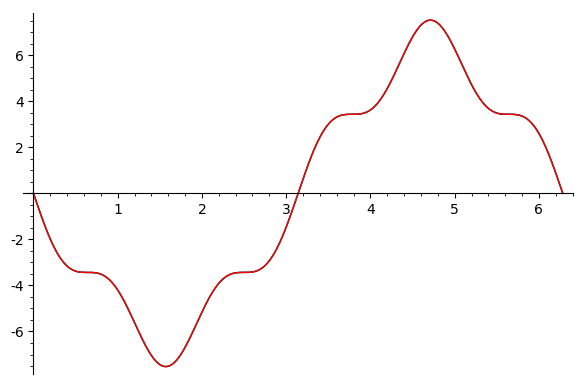

In [91]:
# all the cubics appear to be rotations of each other, though the algebraic values of the angles are not yet known
theta1 = find_root(sym_fn_5(*(vector([1,0])*rotation_matrix(theta)*tbi5s[0])).simplify_full(),  0,   pi)
theta2 = find_root(sym_fn_5(*(vector([1,0])*rotation_matrix(theta)*tbi5s[6])).simplify_full(),  0,   pi)
theta3 = find_root(sym_fn_5(*(vector([1,0])*rotation_matrix(theta)*tbi5s[9])).simplify_full(), pi, 2*pi)

print(theta1,theta2,theta3)

P  = plot( sym_fn_5(*(vector([1,0])*rotation_matrix(theta+theta1)*tbi5s[0])), (theta,0,2*pi) )
P += plot( sym_fn_5(*(vector([1,0])*rotation_matrix(theta+theta2)*tbi5s[6])), (theta,0,2*pi), color='green' )
P += plot( sym_fn_5(*(vector([1,0])*rotation_matrix(theta+theta3)*tbi5s[9])), (theta,0,2*pi), color='red' )

P.show()

In [177]:
def num_partitions(n,coins):
    counts = [0]*(n+1)
    for v in itertools.product(range(n+1),repeat=len(coins)):
        value = vector(v) * vector(coins)
        if value <= n:
            counts[value] += 1
    return counts

for count in enumerate(num_partitions(30,coins=[3,4,5])):
    print( count[0], '\t', count[1] )

0 	 1
1 	 0
2 	 0
3 	 1
4 	 1
5 	 1
6 	 1
7 	 1
8 	 2
9 	 2
10 	 2
11 	 2
12 	 3
13 	 3
14 	 3
15 	 4
16 	 4
17 	 4
18 	 5
19 	 5
20 	 6
21 	 6
22 	 6
23 	 7
24 	 8
25 	 8
26 	 8
27 	 9
28 	 10
29 	 10
30 	 11


In [105]:
wv_8_a = harmonic_leading_term(sym_fn_3*sym_fn_5,8,xs)
wv_8_b = harmonic_leading_term(sym_fn_4^2,8,xs)

In [116]:
circ_a = (wv_8_a(*(vector([1,0])*rotation_matrix(theta)*tbi5s[6]))).simplify_full()
circ_b = (wv_8_b(*(vector([1,0])*rotation_matrix(theta)*tbi5s[6]))).simplify_full()

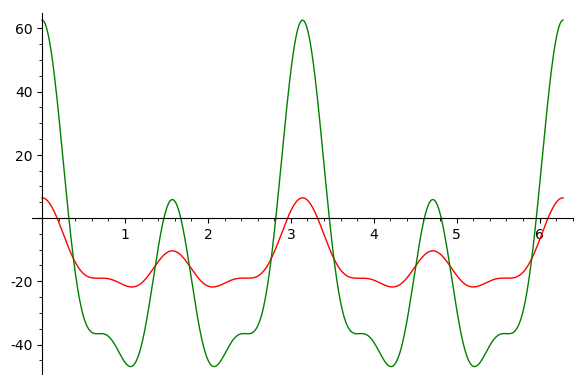

In [117]:
P  = plot( circ_a, (theta,0,2*pi), color='red' )
P += plot( circ_b, (theta,0,2*pi), color='green' )

P.show()

In [120]:
circ_a /= circ_a(pi)
circ_b /= circ_b(pi)

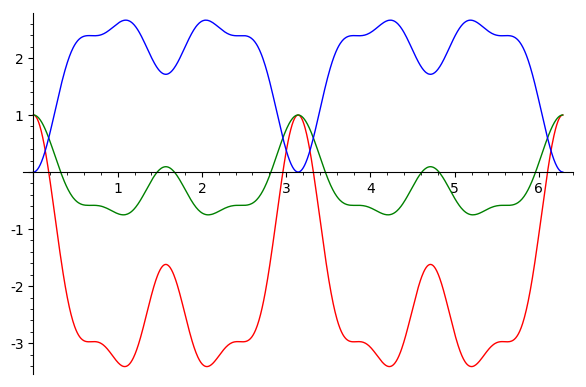

In [123]:
P  = plot( circ_a, (theta,0,2*pi), color='red' )
P += plot( circ_b, (theta,0,2*pi), color='green' )
P += plot( circ_b - circ_a, (theta,0,2*pi), color='blue' )

P.show()

In [134]:
(circ_b - circ_a).trig_reduce()

-6079744/154775*sin(theta)^8 + 117027328/1392975*sin(theta)^6 - 392788/6191*sin(theta)^4 + 632313/30955*sin(theta)^2

4862/9225*cos(8*theta) + 2288/9225*cos(6*theta) + 24739/18450*cos(4*theta) + 19591/18450*cos(2*theta) - 98/45

In [142]:
wv_12_a = harmonic_leading_term(sym_fn_3^4,8,xs).expand()
wv_12_b = harmonic_leading_term(sym_fn_4^3,8,xs).expand()
wv_12_c = harmonic_leading_term(sym_fn_3*sym_fn_4*sym_fn_5,8,xs).expand()

In [143]:
(wv_12_c(*(vector([1,0])*rotation_matrix(theta)*tbi5s[6]))).trig_reduce()

-11319/1280*cos(12*theta) - 264453/4352*cos(10*theta) + 289443/87040*cos(8*theta) - 40719/35360*cos(6*theta) + 1853226711/24893440*cos(4*theta) + 2097621729/24893440*cos(2*theta) + 203994693/1244672

In [144]:
circ12_a = (wv_12_a(*(vector([1,0])*rotation_matrix(theta)*tbi5s[6]))).trig_reduce()
circ12_b = (wv_12_b(*(vector([1,0])*rotation_matrix(theta)*tbi5s[6]))).trig_reduce()
circ12_c = (wv_12_c(*(vector([1,0])*rotation_matrix(theta)*tbi5s[6]))).trig_reduce()

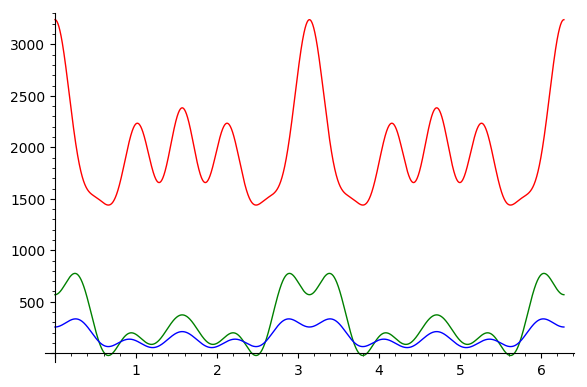

In [145]:
P  = plot( circ12_a, (theta,0,2*pi), color='red' )
P += plot( circ12_b, (theta,0,2*pi), color='green' )
P += plot( circ12_c, (theta,0,2*pi), color='blue' )

P.show()

In [157]:
coeffs = var(['c{}'.format(n) for n in range(3)])

solve( [coeffs[0]*circ12_a(pi) + coeffs[1]*circ12_b(pi) + coeffs[2]*circ12_c(pi)==0,
        coeffs[0]*circ12_a(pi/2) + coeffs[1]*circ12_b(pi/2) + coeffs[2]*circ12_c(pi/2)==0], coeffs)[0]


[c0 == -11324445683337/68190135764080*r14,
 c1 == 11440854082408/23014170820377*r14,
 c2 == r14]

In [173]:
(coeffs[0]*circ12_a + coeffs[1]*circ12_b + coeffs[2]*circ12_c).trig_reduce()

60025/288*c0*cos(12*theta) - 9261/256*c1*cos(12*theta) - 11319/1280*c2*cos(12*theta) - 60025/816*c0*cos(10*theta) - 639009/4352*c1*cos(10*theta) - 264453/4352*c2*cos(10*theta) + 780325/3264*c0*cos(8*theta) - 964467/43520*c1*cos(8*theta) + 289443/87040*c2*cos(8*theta) + 48338255/127296*c0*cos(6*theta) + 8733123/282880*c1*cos(6*theta) - 40719/35360*c2*cos(6*theta) + 491106175/1244672*c0*cos(4*theta) + 2876980113/12446720*c1*cos(4*theta) + 1853226711/24893440*c2*cos(4*theta) + 37935065/311168*c0*cos(2*theta) + 204906429/957440*c1*cos(2*theta) + 2097621729/24893440*c2*cos(2*theta) + 565784155/287232*c0 + 174658923/585728*c1 + 203994693/1244672*c2

In [175]:
solve([491106175/1244672*c0 + 2876980113/12446720*c1 + 1853226711/24893440*c2 == 0,
       37935065/311168*c0 + 204906429/957440*c1 + 2097621729/24893440*c2 == 0,
       565784155/287232*c0 + 174658923/585728*c1 + 203994693/1244672*c2 ==0], [c0,c1,c2])

[[c0 == 0, c1 == 0, c2 == 0]]

In [ ]:
# 30

In [79]:
# two more degree 12 harmonic polynomials, corresponding to the harmonic degree 3 and 4 polys to the 4th and 3rd, respectively

sym_fn_3_4 = harmonic_leading_term(sym_fn_3^4,12,xs).simplify().expand()

assert lap(sym_fn_3_4, xs).simplify_full() == 0

sym_fn_4_3 = harmonic_leading_term(sym_fn_4^3,12,xs).simplify().expand()

assert lap(sym_fn_4_3, xs).simplify_full() == 0

In [31]:
# a symmetric, harmonic polynomial of degree 12 which vanishes at the 3 body coincidences

sym_fn_12p = (((sym_fn_3_4)/(sym_fn_3_4)(x0=tbi4_1[0],x1=tbi4_1[1],x2=tbi4_1[2],x3=tbi4_1[3])) - \
              (sym_fn_4_3)/(sym_fn_4_3)(x0=tbi4_1[0],x1=tbi4_1[1],x2=tbi4_1[2],x3=tbi4_1[3])).expand()

for tbi4 in signed_tbi4s:
    assert sym_fn_12p(x0=t*tbi4[0],x1=t*tbi4[1],x2=t*tbi4[2],x3=t*tbi4[3]) == 0
    
assert lap(sym_fn_12p,xs).simplify() == 0

In [91]:
# in spherical coordinates
sphere_wv = euclid_to_sphere(wv).simplify_full()(r=1).simplify_full()

# normalized
sphere_wv = sphere_wv/sqrt(integrate(integrate(sphere_wv^2,phi,-pi,pi)*sin(theta),theta,0,pi))

In [102]:
R.<x0p,x1p,x2p,x3p> = PolynomialRing(AA)
a_e1 = R(e1(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_e2 = R(e2(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_e3 = R(e3(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_e4 = R(e4(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_p1 = R(p1(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_p2 = R(p2(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_p3 = R(p3(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
a_p4 = R(p4(x0=x0p,x1=x1p,x2=x2p,x3=x3p))

In [165]:
poly_degree = 8

def get_monomials(degree=12):
    powers = [(exp1,exp2,exp3,exp4)
              for exp1, exp2, exp3, exp4 in itertools.product(range(0,degree+1),repeat=4)
              if 1*exp1 + 2*exp2 + 3*exp3 + 4*exp4 == degree]
    monomials = set()
    for (exp1,exp2,exp3,exp4) in powers:
        monomials = monomials.union((a_e1^exp1 * a_e2^exp2 * a_e3^exp3 * a_e4^exp4).dict().keys())
    monomials = list(monomials)
    monomials.sort()
    basis_dict = { mon: n for n, mon in enumerate(monomials)}
    rev_basis_dict = { n: mon for n, mon in enumerate(monomials)}
    return basis_dict, rev_basis_dict
    
basis_dict, rev_basis_dict = get_monomials(degree=poly_degree)

def poly_to_vec(p):
    dp = p.dict()
    return vector([ dp[monomial] if monomial in dp else 0 for monomial in basis_dict.keys()])
        
def get_sym_matrix(degree=12):
    powers = [(exp1,exp2,exp3,exp4) 
              for exp1, exp2, exp3, exp4 in itertools.product(range(0,degree+1),repeat=4)
              if 1*exp1 + 2*exp2 + 3*exp3 + 4*exp4 == degree]
    return matrix([poly_to_vec(a_e1^exp1 * a_e2^exp2 * a_e3^exp3 * a_e4^exp4) 
                   for (exp1,exp2,exp3,exp4) in powers ])

rows, cols = get_sym_matrix(degree=poly_degree).dimensions()

mat = get_sym_matrix(degree=poly_degree)

In [166]:
efs = var(['ef{}'.format(n) for n in range(rows)])

vefs = vector(efs)

In [173]:
a_wavef4 = R(g_8_harm(x0=x0p,x1=x1p,x2=x2p,x3=x3p))
v_wavef4 = poly_to_vec(a_wavef4)

In [174]:
solve(list(vefs*mat - v_wavef4), list(efs))

[[ef0 == 16, ef1 == 3, ef2 == -4, ef3 == (3/10), ef4 == -8, ef5 == -2, ef6 == (5/2), ef7 == 5, ef8 == (2/5), ef9 == -2, ef10 == (-1/2), ef11 == (1/5), ef12 == (1/2), ef13 == (-3/20), ef14 == (3/160)]]

In [175]:
import itertools
for eqn in zip(solve(list(vefs*mat - v_wavef4), list(efs))[0], 
               [(exp1,exp2,exp3,exp4) 
                for exp1, exp2, exp3, exp4 in itertools.product(range(0,poly_degree+1),repeat=4)
                if 1*exp1 + 2*exp2 + 3*exp3 + 4*exp4 == poly_degree]):
    print(*eqn)

ef0 == 16 (0, 0, 0, 2)
ef1 == 3 (0, 1, 2, 0)
ef2 == -4 (0, 2, 0, 1)
ef3 == (3/10) (0, 4, 0, 0)
ef4 == -8 (1, 0, 1, 1)
ef5 == -2 (1, 2, 1, 0)
ef6 == (5/2) (2, 0, 2, 0)
ef7 == 5 (2, 1, 0, 1)
ef8 == (2/5) (2, 3, 0, 0)
ef9 == -2 (3, 1, 1, 0)
ef10 == (-1/2) (4, 0, 0, 1)
ef11 == (1/5) (4, 2, 0, 0)
ef12 == (1/2) (5, 0, 1, 0)
ef13 == (-3/20) (6, 1, 0, 0)
ef14 == (3/160) (8, 0, 0, 0)


In [172]:
g_8 = product(xs[i]^2+xs[j]^2+xs[k]^2-xs[i]*xs[j]-xs[i]*xs[k]-xs[j]*xs[k] for i, j, k in combinations(range(4),3) )

g_8_harm = harmonic_leading_term(g_8,8,xs).simplify().expand()

g_8_harm

3/160*x0^8 - 7/40*x0^6*x1^2 + 49/80*x0^4*x1^4 - 7/40*x0^2*x1^6 + 3/160*x1^8 - 7/40*x0^6*x2^2 - 21/40*x0^4*x1^2*x2^2 - 21/40*x0^2*x1^4*x2^2 - 7/40*x1^6*x2^2 + 49/80*x0^4*x2^4 - 21/40*x0^2*x1^2*x2^4 + 49/80*x1^4*x2^4 - 7/40*x0^2*x2^6 - 7/40*x1^2*x2^6 + 3/160*x2^8 - 7/40*x0^6*x3^2 - 21/40*x0^4*x1^2*x3^2 - 21/40*x0^2*x1^4*x3^2 - 7/40*x1^6*x3^2 - 21/40*x0^4*x2^2*x3^2 + 189/20*x0^2*x1^2*x2^2*x3^2 - 21/40*x1^4*x2^2*x3^2 - 21/40*x0^2*x2^4*x3^2 - 21/40*x1^2*x2^4*x3^2 - 7/40*x2^6*x3^2 + 49/80*x0^4*x3^4 - 21/40*x0^2*x1^2*x3^4 + 49/80*x1^4*x3^4 - 21/40*x0^2*x2^2*x3^4 - 21/40*x1^2*x2^2*x3^4 + 49/80*x2^4*x3^4 - 7/40*x0^2*x3^6 - 7/40*x1^2*x3^6 - 7/40*x2^2*x3^6 + 3/160*x3^8

In [183]:
wv = g_8_harm(*(Pm*Qm*vector(ys))).simplify_full().expand()

for tbi3 in signed_tbi3s:
    pretty_print( wv(y0=t*tbi3[0],y1=t*tbi3[1],y2=t*tbi3[2]) )

sphere_wv = euclid_to_sphere(wv).simplify_full()(r=1).simplify_full()

sphere_wv

-13/1440*t^8

-13/1440*t^8

-13/1440*t^8

-13/1440*t^8

-13/1440*t^8

-13/1440*t^8

-13/1440*t^8

-13/1440*t^8

1/2880*sqrt(2)*(10*(17*sqrt(2)*cos(phi)^8 + 288*sqrt(2)*cos(phi)^6 - 768*sqrt(2)*cos(phi)^4 + 512*sqrt(2)*cos(phi)^2 + 112*(cos(phi)^7 - 4*cos(phi)^5)*sin(phi))*sin(theta)^8 - 20*(161*sqrt(2)*cos(phi)^6 - 462*sqrt(2)*cos(phi)^4 + 336*sqrt(2)*cos(phi)^2 - 28*(5*cos(phi)^5 + 4*cos(phi)^3)*sin(phi) + 32*sqrt(2))*sin(theta)^6 - 30*(49*sqrt(2)*cos(phi)^4 + 56*cos(phi)^3*sin(phi) - 56*sqrt(2)*cos(phi)^2 - 32*sqrt(2))*sin(theta)^4 - 360*sqrt(2)*sin(theta)^2 + 27*sqrt(2))

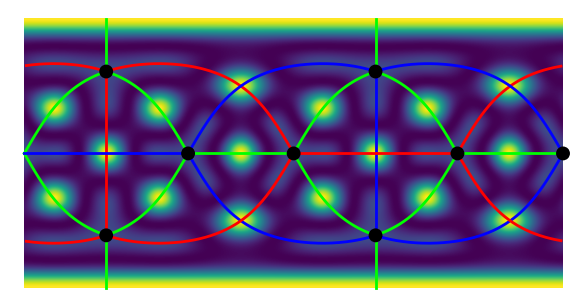

In [184]:
Pmag = density_plot(abs(sphere_wv)^2, (phi,-pi,pi), (theta,0,pi), cmap=cm.viridis,
                    plot_points=200,aspect_ratio=1,axes=False)

Pmag + P_twocurves